In [ ]:
#Name: Sachi Shah
#Roll No.: C094
#Aim: Implement multi-classification problem using different binary classifiers

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = load_iris()
X = pd.DataFrame(df["data"], columns=df["feature_names"])
y = pd.DataFrame(df["target"], columns=["species"])
iris_df = X.join(y)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts()

species
0          50
1          50
2          50
dtype: int64

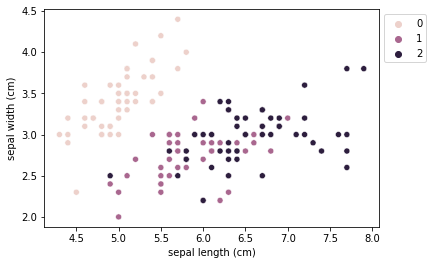

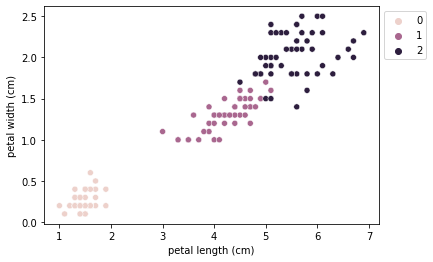

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='species', data=X.join(y), )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

sns.scatterplot(x='petal length (cm)', y='petal width (cm)',
                hue='species', data=X.join(y), )
 
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
 
plt.show()

In [ ]:
# Create separate datasets for each class
X1 = X[y["species"] == 0]
X2 = X[y["species"] == 1]
X3 = X[y["species"] == 2]

# Create 3 binary classification problems using one-versus-the-rest technique
classifiers = []
for i in range(3):
    # Create binary target vector for the i-th class
    y_binary = np.where(y["species"] == i, 1, 0)
    
    # Train logistic regression classifier on the binary problem
    clf = LogisticRegression()
    clf.fit(X, y_binary)
    
    classifiers.append(clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
y_pred = np.argmax([clf.predict_proba(X_test)[:, 1] for clf in classifiers], axis=0)  # Predicted labels
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
np.hstack(y_test.to_numpy())

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [ ]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.to_numpy().reshape(1, -1)[0], y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [ ]:
properly_classified_data = np.zeros((3, 3))
for true_label, pred_label in zip(np.hstack(y_test.to_numpy()), y_pred):
    properly_classified_data[true_label, pred_label] += 1

print("Properly Classified Data (Actual Classes vs Predicted Classes):")
properly_classified_data

Properly Classified Data (Actual Classes vs Predicted Classes):


array([[10.,  0.,  0.],
       [ 0.,  8.,  1.],
       [ 0.,  0., 11.]])

In [ ]:
# Compute error rate
error_rate = 1 - np.trace(properly_classified_data) / len(y_test)

print('Misclassification Rate:', error_rate)

Misclassification Rate: 0.033333333333333326
